## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
Data  =pd.read_csv("L:/Datascience_Project/trafficDataset/south_week21.csv",usecols=['QKFZ','VKFZ','Traffic'])


### Seperating Data from labels

In [3]:
X = Data.iloc[:575760,0:2]
X.shape

(575760, 2)

In [4]:
y = Data.iloc[:575760,2]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Traffic, dtype: float64

### As we dont have test data, 20% data is taken from original Data.

In [5]:
testData = Data.iloc[575761:,0:2]


In [6]:
testData.head()

,QKFZ,VKFZ
575761,2400,122.350000
575762,3480,115.862069
575763,3180,112.283019
575764,0,-1.000000
575765,0,-1.000000


In [7]:
testLabels = Data.iloc[575761:len(Data),2]

## Cleaning the Data 

In [8]:
labels=y.values
labels=labels.astype(int)
labels=(labels.flatten())
labels

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
import math
cleanData=np.nan_to_num(X)
cleanData[cleanData==-math.inf]=0 #make the -inf values to 0
cleanData[cleanData==math.inf]=0

## Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
X=cleanData
y=labels    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=55)

### Giving to RandomForrests
We can also save the model in "tree"

In [11]:
#this part of code  determines the accuracy of classification of decision trees into different statistics of same dataset 
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import seaborn as sn

tree = RandomForestClassifier().fit(X_train, y_train)

joblib.dump(tree, 'south_week21_Model.pkl')

y_pred = tree.predict(X_test)

print('Tree accuracy on '+ 'X_reduced_data' +' reduced dataset'+'='+str(accuracy_score(list(y_test), list(y_pred))))



C:\Users\Lambert\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Tree accuracy on X_reduced_data reduced dataset=0.9993515816775508


### Test Data
Here we load the persisted model and test with the new data which is not trained by the model.

In [12]:
clf = joblib.load('south_week21_Model.pkl')

In [13]:
testData.head()

,QKFZ,VKFZ
575761,2400,122.350000
575762,3480,115.862069
575763,3180,112.283019
575764,0,-1.000000
575765,0,-1.000000


### Cleaning test data as per training data

In [14]:
testData=np.nan_to_num(testData)
testData[testData==-math.inf]=0 #make the -inf values to 0
testData[testData==math.inf]=0


In [15]:
testlabels=testLabels.values
testlabels=testlabels.astype(int)
testlabels=(testlabels.flatten())
testlabels

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
test_pred= clf.predict(testData)

In [17]:
print(metrics.classification_report(list(testlabels), list(test_pred)))

              precision    recall  f1-score   support

 -2147483648       0.00      0.00      0.00         1
           0       1.00      1.00      1.00    147216
           1       0.96      0.99      0.97      2782

   micro avg       1.00      1.00      1.00    149999
   macro avg       0.65      0.66      0.66    149999
weighted avg       1.00      1.00      1.00    149999



### New Test Data

In [19]:
Data_check  =pd.read_csv("L:/Datascience_Project/trafficDataset/north_may_N06.csv",usecols=['QKFZ','VKFZ','Traffic'])


In [20]:
td = Data_check.iloc[:,0:2]

In [21]:
td=np.nan_to_num(td)
td[td==-math.inf]=0 #make the -inf values to 0
td[td==math.inf]=0

In [22]:
td_l = Data_check.iloc[:,2]

In [23]:
td_l=td_l.values
td_l=td_l.astype(int)
td_l=(td_l.flatten())
td_l

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
t_pred= clf.predict(td)

In [25]:
print(metrics.classification_report(list(td_l), list(t_pred)))

              precision    recall  f1-score   support

 -2147483648       0.00      0.00      0.00         1
           0       1.00      1.00      1.00    195955
           1       0.97      1.00      0.99      5644

   micro avg       1.00      1.00      1.00    201600
   macro avg       0.66      0.67      0.66    201600
weighted avg       1.00      1.00      1.00    201600



C:\Users\Lambert\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lambert\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lambert\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
from sklearn.metrics import confusion_matrix
cM=confusion_matrix(list(td_l), list(t_pred), labels=None, sample_weight=None)


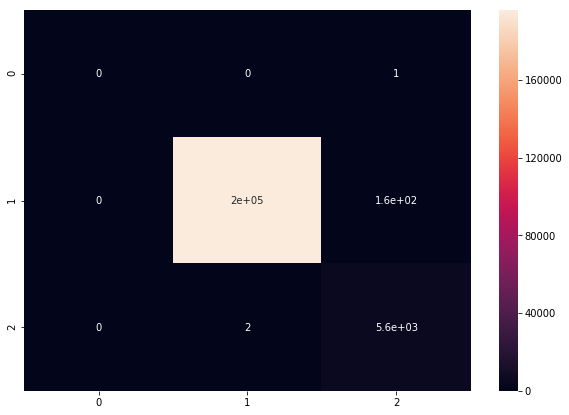

In [28]:
plt.figure(figsize = (10,7))
plt.set_cmap('Blues')
sn.heatmap(cM, annot=True)

In [ ]:
exp_series = pd.Series(td_l)
pred_series = pd.Series(t_pred)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

In [ ]:
metrics.f1_score(td_l, t_pred, average='weighted', labels=np.unique(t_pred))